C:\Users\mnica\AppData\Local\Temp\ipykernel_16612\2569508614.py:5: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("df1.csv")


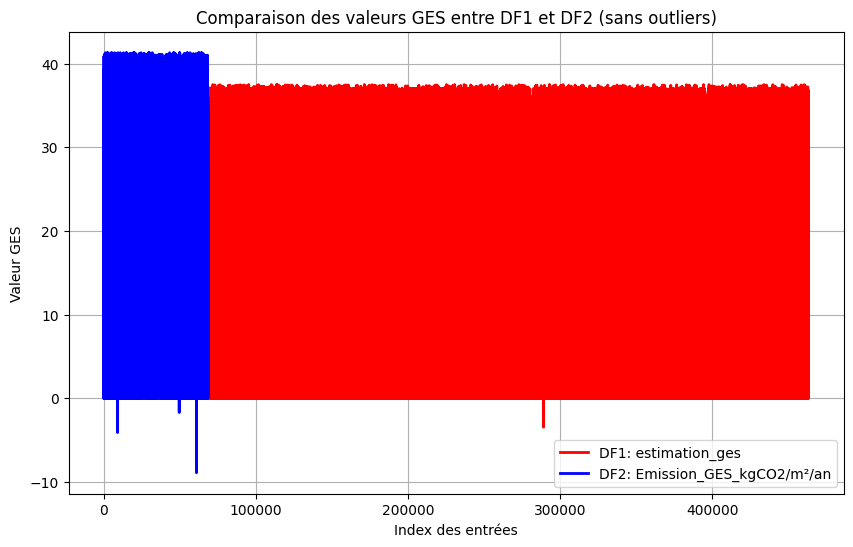

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les fichiers CSV
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")

# Vérifier si les colonnes existent
if "estimation_ges" not in df1.columns:
    print("Erreur : La colonne 'estimation_ges' est introuvable dans df1.csv")
    exit()

if "Emission_GES_kgCO2/m²/an" not in df2.columns:
    print("Erreur : La colonne 'Emission_GES_kgCO2/m²/an' est introuvable dans df2.csv")
    exit()

# Fonction pour supprimer les outliers avec la méthode IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer le filtrage sur les deux colonnes
df1_filtered = remove_outliers_iqr(df1, "estimation_ges")
df2_filtered = remove_outliers_iqr(df2, "Emission_GES_kgCO2/m²/an")

# Créer un axe X correspondant aux indices après filtrage
x1 = range(len(df1_filtered))
x2 = range(len(df2_filtered))

# Tracer les courbes après filtrage
plt.figure(figsize=(10, 6))

plt.plot(x1, df1_filtered["estimation_ges"], color='red', label="DF1: estimation_ges", linewidth=2)
plt.plot(x2, df2_filtered["Emission_GES_kgCO2/m²/an"], color='blue', label="DF2: Emission_GES_kgCO2/m²/an", linewidth=2)

# Ajouter des titres et une légende
plt.title("Comparaison des valeurs GES entre DF1 et DF2 (sans outliers)")
plt.xlabel("Index des entrées")
plt.ylabel("Valeur GES")
plt.legend()
plt.grid()

# Afficher le graphique
plt.show()


In [7]:
import pandas as pd

# Charger les fichiers CSV
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")

# Convertir en numérique, en forçant les erreurs à NaN
df1["estimation_ges"] = pd.to_numeric(df1["estimation_ges"], errors="coerce")
df1["surface_utile"] = pd.to_numeric(df1["surface_utile"], errors="coerce")

# Vérifier si la colonne surface_utile existe dans df1
if "surface_utile" in df1.columns:
    df1["estimation_ges_m2"] = df1["estimation_ges"] / df1["surface_utile"]
else:
    print("⚠ Attention : Pas de colonne 'surface_utile' dans df1. Impossible de normaliser.")


# Vérifier la présence des colonnes
if "estimation_ges" not in df1.columns:
    print("Erreur : La colonne 'estimation_ges' est introuvable dans df1.csv")
    exit()
if "Emission_GES_kgCO2/m²/an" not in df2.columns:
    print("Erreur : La colonne 'Emission_GES_kgCO2/m²/an' est introuvable dans df2.csv")
    exit()

# Vérifier si la colonne surface_utile existe dans df1
if "surface_utile" in df1.columns:
    df1["estimation_ges_m2"] = df1["estimation_ges"] / df1["surface_utile"]
else:
    print("⚠ Attention : Pas de colonne 'surface_utile' dans df1. Impossible de normaliser.")

# Afficher les statistiques pour comparer les unités
print("\n Statistiques sur estimation_ges (DF1)")
print(df1["estimation_ges"].describe())



print("\n Statistiques sur Emission_GES_kgCO2/m²/an (DF2)")
print(df2["Emission_GES_kgCO2/m²/an"].describe())


C:\Users\mnica\AppData\Local\Temp\ipykernel_16612\1847660292.py:4: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("df1.csv")



 Statistiques sur estimation_ges (DF1)
count    5.155370e+05
mean     3.839366e+01
std      9.622183e+03
min     -2.924000e+01
25%      0.000000e+00
50%      2.460000e+00
75%      1.500000e+01
max      4.766768e+06
Name: estimation_ges, dtype: float64

 Statistiques sur Emission_GES_kgCO2/m²/an (DF2)
count     75200.000000
mean         27.658473
std         932.565699
min          -8.900000
25%           3.800000
50%           7.800000
75%          18.800000
max      199701.700000
Name: Emission_GES_kgCO2/m²/an, dtype: float64
